### Metadata

* 'Property_ID', = Unique id of the property
* 'room',  No. of rooms available
* 'layout_type',  ['BHK' 'RK']
* 'property_type', = ['Apartment' 'Studio Apartment' 'Independent Floor' 'Independent House' 'Villa' 'Penthouse']
* 'locality',  = Overall Locality description
* 'price', = Rent in INR
* 'area', = in Square Feet
* 'furnish_type', ['Semi-Furnished' 'Furnished' 'Unfurnished']
* 'bathroom',: No. of Bathrooms
* 'city', : ['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai' 'Pune']
* 'parking_spaces',: 1 or 0  : 1 = Yes, 0 = No
* 'floor',: Floor from 0 to 20
* 'pet_friendly', : 1 or 0  : 1 = Yes, 0 = No
* 'power_backup', : 1 or 0  : 1 = Yes, 0 = No
* 'washing_machine',: 1 or 0  : 1 = Yes, 0 = No
* 'air_conditioner', : 1 or 0  : 1 = Yes, 0 = No
* 'geyser/solar',: 1 or 0  : 1 = Yes, 0 = No
* 'security_deposit', Amount of Security Deposit
* 'neighborhood', : Nearest Metro/Bus/Mall in meters
* 'CCTV/security : CCTV available 1 or 0  : 1 = Yes, 0 = No
* 'lift': 1 or 0  : 1 = Yes, 0 = No

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [15, 6]

In [5]:
# import the train and test
train = pd.read_csv("~/Downloads/train_csv2022.csv")
test = pd.read_csv("~/Downloads/test_csv2022.csv")

In [6]:
train.shape,  test.shape

((114480, 21), (20203, 20))

### Exploratory Data Analysis

In [7]:
combined = pd.concat([train, test], ignore_index = True)

In [8]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       134683 non-null  int64  
 1   room              134683 non-null  int64  
 2   layout_type       134683 non-null  object 
 3   property_type     134683 non-null  object 
 4   locality          134683 non-null  object 
 5   area              134683 non-null  int64  
 6   furnish_type      134683 non-null  object 
 7   bathroom          134683 non-null  int64  
 8   city              134683 non-null  object 
 9   parking_spaces    134683 non-null  int64  
 10  floor             134683 non-null  int64  
 11  pet_friendly      134683 non-null  int64  
 12  power_backup      134683 non-null  int64  
 13  washing_machine   134683 non-null  int64  
 14  air_conditioner   134683 non-null  int64  
 15  geyser/solar      134683 non-null  int64  
 16  security_deposit  13

In [9]:
combined.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1500,4716.0
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,300,24969.0
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1300,24146.0
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3600,36260.0
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,200,176156.0


In [11]:
# List of Numerical Vars

combined.select_dtypes(include = np.number).columns

Index(['Property_ID', 'room', 'area', 'bathroom', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price'],
      dtype='object')

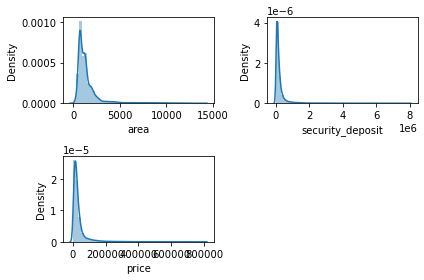

In [15]:
cols = ['area', 'security_deposit', 'price']

a = 2
b = 2
c = 1

for i in cols:
    plt.subplot(a,b,c)
    sns.distplot(combined[i])
    c = c+1
    
plt.tight_layout()
plt.show()

# All the Numerical Variables are skewed in Nature.

In [17]:
# Cat Columns
combined.select_dtypes(exclude = np.number).columns

Index(['layout_type', 'property_type', 'locality', 'furnish_type', 'city'], dtype='object')

In [24]:
cols = ['layout_type', 'property_type',  'furnish_type', 'room', 
        'bathroom', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 
        'air_conditioner',
       'geyser/solar', 'CCTV/security', 'lift', 'city']

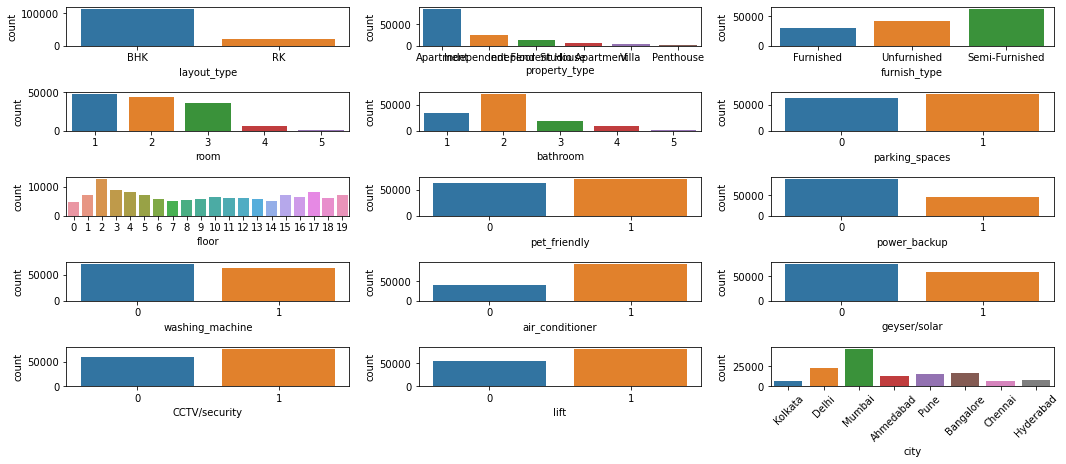

In [29]:
a = 5
b = 3
c = 1

for i in cols:
    plt.subplot(a, b, c)
    sns.countplot(combined.loc[:, i])
    c = c+1
    
plt.tight_layout()
plt.xticks(rotation = 45)
#plt.title()
plt.show()

#### Inferences

* Most of Rentals are seen in **Mumbai**
* Most of the Properties have **lift followed by CCTV and AC**
* Properties do not have Geysers followed by less Washing Machines and no Power Back Up.
* **Pet Friendly Houses** exist in the Data followed by **Parking Space**
* No of **Bathrooms range from 1 to 5**
* Max Bedrooms are 5 and therefore the houses in the data are from 1BHK to 5 BHK.

* Most of the rental houses are **semi-furnished** in nature.
* The frequency of **Apartments** are more than any other type of property in the dataset.

* People generally prefer **Rentals on the 02nd Floor**

In [30]:
# Check Missing Values
combined.isnull().sum().sum()

20203

<AxesSubplot:xlabel='area', ylabel='price'>

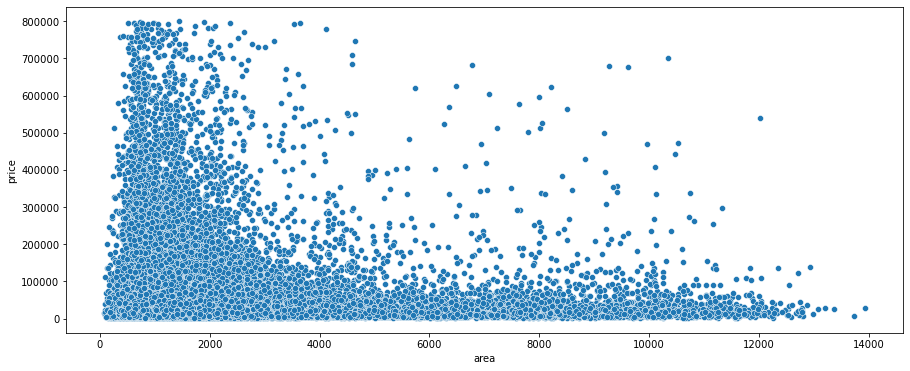

In [31]:
# Bivariate Analysis

# area vs price
sns.scatterplot(x = "area", y = "price", data = combined)

In [33]:
combined.loc[:, ["area", "price"]].corr()

,area,price
area,1.000000,0.021358
price,0.021358,1.000000


<AxesSubplot:xlabel='security_deposit', ylabel='price'>

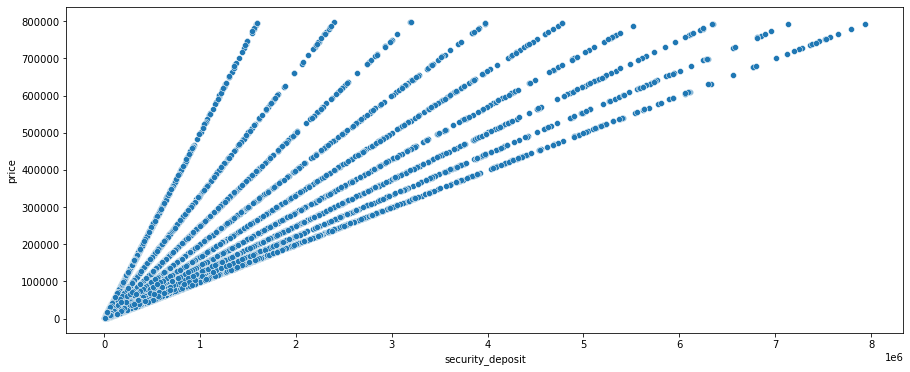

In [34]:
# area vs price
sns.scatterplot(x = "security_deposit", y = "price", data = combined)

# Security Deposit varies a lot with the rental price

In [35]:
combined.security_deposit.describe()

count    1.346830e+05
mean     2.202480e+05
std      4.204503e+05
min      3.180000e+03
25%      5.580250e+04
50%      1.142640e+05
75%      2.207045e+05
max      7.940780e+06
Name: security_deposit, dtype: float64

In [39]:
combined.loc[:, ["neighbourhood", "price"]].corr()

,neighbourhood,price
neighbourhood,1.000000,-0.016894
price,-0.016894,1.000000


<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

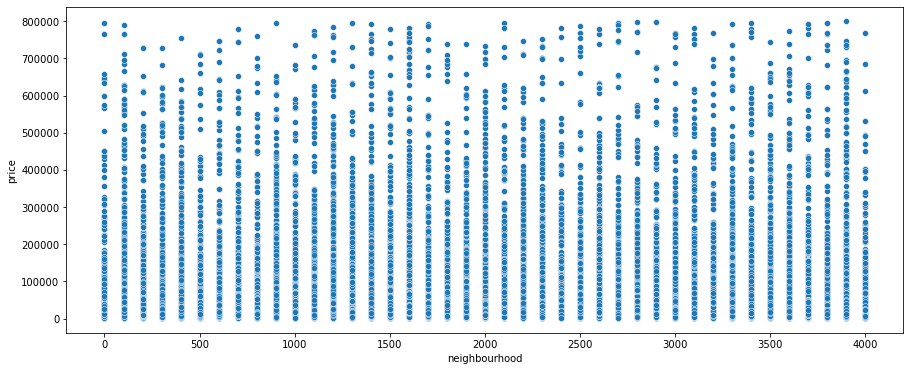

In [40]:
sns.scatterplot(x = "neighbourhood", y = "price", data = combined)

In [42]:
# Convert Distance in Kms
combined["neighbourhood"] = combined["neighbourhood"]/1000

In [44]:
# Bin the Neighbourhood
combined.neighbourhood.describe()

count    134683.000000
mean          2.033024
std           1.159636
min           0.000000
25%           1.100000
50%           2.000000
75%           3.000000
max           4.000000
Name: neighbourhood, dtype: float64

In [48]:
def outcome(x):
    if(x<=2):
        return("Near")
    else:
        return("Far")

In [50]:
combined["Neighbour_Dist"] = combined.neighbourhood.apply(outcome)

In [51]:
combined.groupby("Neighbour_Dist")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
Neighbour_Dist,,,,,,,,
Far,54892.0,36046.794506,62801.293570,1590.0,11502.0,20152.0,35046.25,799325.0
Near,59588.0,37317.795244,62750.203871,1624.0,12496.0,21526.5,36879.25,795827.0


<AxesSubplot:xlabel='Neighbour_Dist', ylabel='price'>

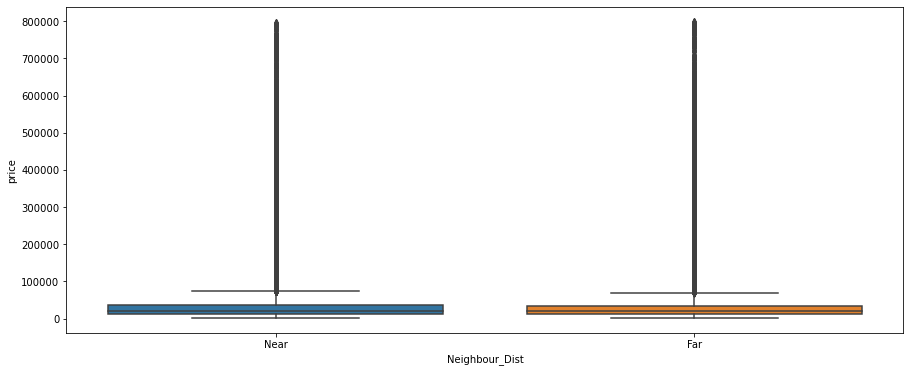

In [52]:
sns.boxplot(x = "Neighbour_Dist", y = "price", data = combined)

In [55]:
combined.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price', 'Neighbour_Dist'],
      dtype='object')

In [56]:
# Convert the Features in Object
combined["parking_spaces"] = combined.parking_spaces.astype("object")
combined["floor"] = combined.floor.astype("object")
combined["pet_friendly"] = combined.pet_friendly.astype("object")
combined["power_backup"] = combined.power_backup.astype("object")
combined["washing_machine"] = combined.washing_machine.astype("object")
combined["air_conditioner"] = combined.air_conditioner.astype("object")
combined["geyser/solar"] = combined["geyser/solar"].astype("object")
combined["CCTV/security"] = combined["CCTV/security"].astype("object")
combined["lift"] = combined["lift"].astype("object")

<AxesSubplot:xlabel='bathroom', ylabel='price'>

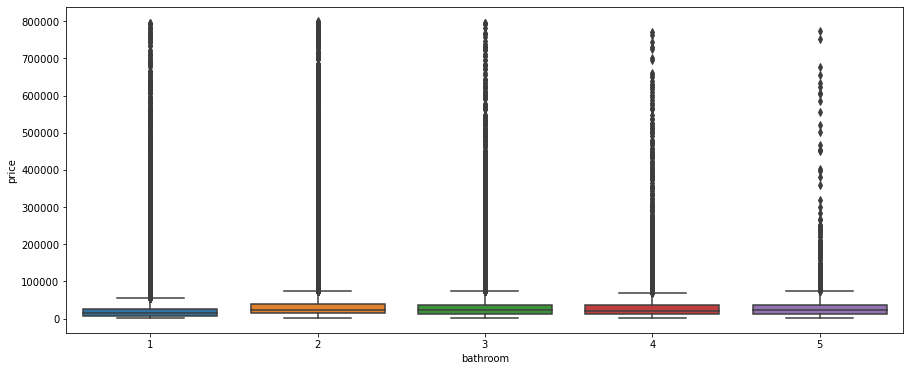

In [60]:
# Room vs price
sns.boxplot(x = "bathroom", y = "price", data = combined)

In [61]:
combined.groupby("bathroom")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
bathroom,,,,,,,,
1,29375.0,29958.473362,62071.197537,1590.0,6787.0,13767.0,26306.00,796196.0
2,60993.0,39175.249324,61388.919179,1597.0,14899.0,23874.0,38877.00,799325.0
3,15698.0,39257.046184,66622.826936,1824.0,13376.0,22543.5,37548.25,796184.0
4,6905.0,37024.058653,64508.609453,1599.0,12302.0,20500.0,35265.00,771600.0
5,1509.0,40436.748840,72388.163742,1953.0,12105.0,21773.0,37031.00,773539.0


In [62]:
combined["room"] = combined["room"].astype("object")
combined["bathroom"] = combined["bathroom"].astype("object")

In [65]:
combined.head(2)

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_Dist
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near


<AxesSubplot:xlabel='city', ylabel='price'>

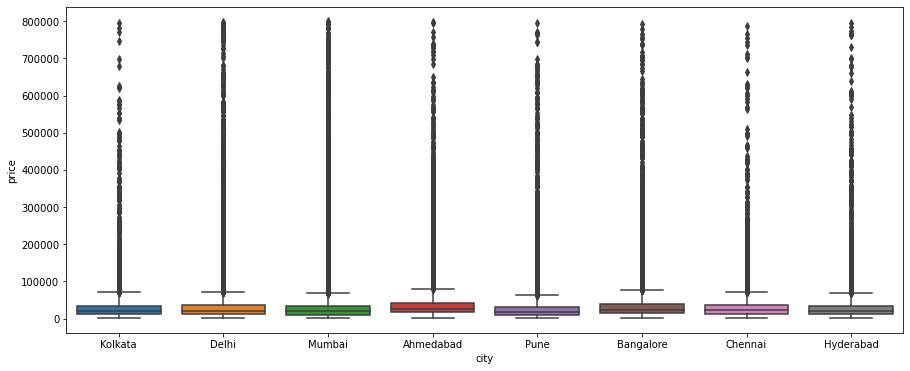

In [66]:
# City
sns.boxplot(combined.city, combined.price)

In [67]:
# City in North, South, West and East Region

east = ["Kolkata"]
north = ["Delhi", "Ahmedabad"]
west = ["Pune", "Mumbai"]
south = ["Bangalore", "Chennai", "Hyderabad"]

In [68]:
def regionals(x):
    if x in north:
        return("North")
    elif x in west:
        return("West")
    elif x in south:
        return("South")
    else:
        return("East")

In [70]:
combined["City_Cat"] = combined.city.apply(regionals)

<AxesSubplot:xlabel='City_Cat', ylabel='price'>

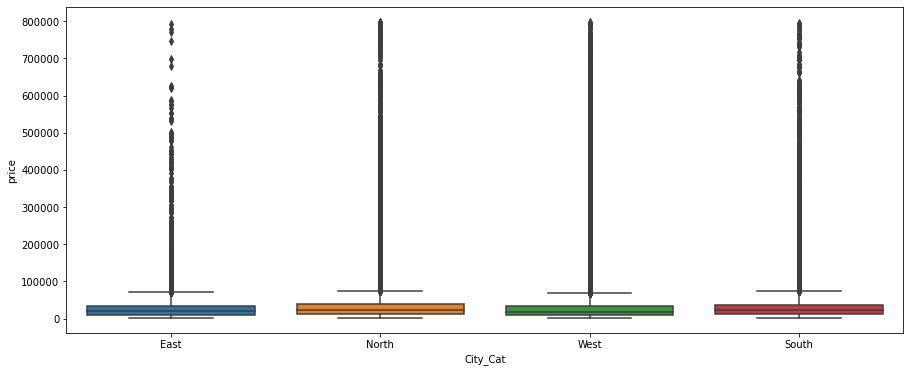

In [71]:
sns.boxplot(combined.City_Cat, combined.price)

In [72]:
combined.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_Dist,City_Cat
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near,West
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near,East


In [77]:
combined.groupby("layout_type")["room"].describe()

,count,unique,top,freq
layout_type,,,,
BHK,114684,5,2,38418
RK,19999,5,1,9704


In [76]:
combined.layout_type.value_counts()

BHK    114684
RK      19999
Name: layout_type, dtype: int64

In [82]:
# Converting RK in to BHK where the room is >1
combined.loc[(combined.layout_type=="RK") & (combined.room>1), 
             "layout_type"] ="BHK"

In [93]:
# Fixing Washrooms basis RK
combined.loc[(combined.layout_type=="RK") & 
             (combined.bathroom>1),"bathroom"]="1"

In [99]:
combined.locality.nunique() # there are 3700 localities in the data

3706

In [100]:
combined.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_Dist,City_Cat
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North
2,120243,2,BHK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near,West
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near,East


In [102]:
# Map the Locality
encoded = train.groupby("locality")["price"].median()

In [104]:
combined["locality"] = combined.locality.map(encoded)

In [110]:
# Furnish Type
furnishencoded = train.groupby("furnish_type")["price"].median()
combined["furnish_type"] = combined.furnish_type.map(furnishencoded)

In [114]:
# Frequency Encoding for Floor
combined["floor_encoded"] = combined.floor.value_counts()/combined.shape[0]

In [116]:
combined.isnull().sum()

Property_ID              0
room                     0
layout_type              0
property_type            0
locality               214
area                     0
furnish_type             0
bathroom                 0
city                     0
parking_spaces           0
floor                    0
pet_friendly             0
power_backup             0
washing_machine          0
air_conditioner          0
geyser/solar             0
security_deposit         0
CCTV/security            0
lift                     0
neighbourhood            0
price                20203
Neighbour_Dist           0
City_Cat                 0
floor_encoded       134663
dtype: int64

In [118]:
# Drop the Vars
combined.drop(["Property_ID", 
               "city", "floor_encoded"], axis = 1, inplace = True)

In [120]:
# Impute Locality with a Dummy Number
combined.locality.fillna(-9999, inplace = True)

In [123]:
# Floor basis price

combined.groupby("floor")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
floor,,,,,,,,
0,4031.0,38226.887869,64022.821530,1810.0,13424.00,22372.0,38164.50,782949.0
1,6041.0,37137.972852,65159.722254,1614.0,12177.00,20788.0,36027.00,796196.0
2,10804.0,35502.989263,64111.486726,1590.0,9893.00,18949.0,34543.00,798219.0
3,7533.0,34761.811762,63399.086911,1674.0,10271.00,19191.0,34263.00,780396.0
4,7046.0,35576.418393,61046.056676,1620.0,11019.50,20435.5,35522.50,792355.0
5,5893.0,36041.928559,59254.917307,1668.0,11889.00,20873.0,35793.00,756990.0
6,4946.0,37779.829357,61916.250196,1599.0,12696.75,21898.0,37452.50,787019.0
7,4203.0,36397.918630,60511.809365,1701.0,12700.00,21211.0,35866.50,799325.0
8,4495.0,36237.947275,62535.135661,1693.0,11594.00,21002.0,35290.00,799123.0


In [127]:
# Target Encoding on Floor
#del furnishencoded

floor_encoded = train.groupby("floor")["price"].median()
combined["floor_encoded"] = combined.floor.map(floor_encoded)

In [130]:
combined.property_type.unique()

array(['Apartment', 'Independent Floor', 'Independent House',
       'Studio Apartment', 'Villa', 'Penthouse'], dtype=object)

In [133]:
# Replace ind floor with house

combined.replace(to_replace = "Independent Floor", 
                 value = "Independent House", inplace = True)

In [138]:
combined.groupby("property_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,73773.0,37167.339650,62637.798670,1597.0,12679.0,21682.0,36549.00,799325.0
Independent House,33371.0,36550.858200,62778.112071,1590.0,11399.5,20231.0,35737.00,794167.0
Penthouse,419.0,36856.942721,72949.821445,1921.0,10835.5,17931.0,32804.00,703969.0
Studio Apartment,4889.0,31808.934138,61858.571188,1703.0,7978.0,15768.0,29672.00,799123.0
Villa,2028.0,34384.443787,67128.927074,1620.0,9142.5,16921.5,31548.25,780545.0


In [143]:
# We will have to fix the Prop Type for Rk

combined.loc[combined.layout_type=="RK", "property_type"].value_counts()

Apartment            5278
Independent House    3292
Studio Apartment     1134
Name: property_type, dtype: int64

In [141]:
# Replacing Villa & penthouse in Studio...
combined.loc[(combined.layout_type=="RK") & 
             (combined.property_type=="Penthouse"),
             "property_type"]="Studio Apartment"

In [142]:
combined.loc[(combined.layout_type=="RK") & 
             (combined.property_type=="Villa"),
             "property_type"]="Studio Apartment"

In [150]:
combined.head(2)

,room,layout_type,property_type,locality,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_Dist,City_Cat,floor_encoded
0,4,BHK,Apartment,17264.0,805,21404.0,2,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East,19191.0
1,2,BHK,Apartment,21215.0,1093,21404.0,2,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North,20321.0


In [152]:
# bathroom into integer
combined["bathroom"] = combined.bathroom.astype("int")

In [156]:
combined.drop("floor", axis = 1, inplace = True)

In [157]:
pd.get_dummies(combined, drop_first = True).shape

(134683, 26)

In [159]:
dummydata = pd.get_dummies(combined, drop_first = True)

In [160]:
train.shape, test.shape

((114480, 21), (20203, 20))

In [161]:
newtrain = dummydata.loc[0:train.shape[0]-1, :]
newtest = dummydata.loc[train.shape[0]:, :]

In [162]:
newtrain.shape, newtest.shape

((114480, 26), (20203, 26))

### Statistics & Unsupervised Machine Learning

In [163]:
newtrain.head()

,room,locality,area,furnish_type,bathroom,parking_spaces,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,floor_encoded,layout_type_RK,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,Neighbour_Dist_Near,City_Cat_North,City_Cat_South,City_Cat_West
0,4,17264.0,805,21404.0,2,1,0,0,0,1,0,33012,0,0,1.5,4716.0,19191.0,0,0,0,0,0,1,0,0,0
1,2,21215.0,1093,21404.0,2,1,0,0,0,1,0,74907,1,1,0.3,24969.0,20321.0,0,0,0,0,0,1,1,0,0
2,2,20929.0,1227,16047.0,2,0,0,0,0,0,0,217314,1,0,1.3,24146.0,18949.0,0,1,0,0,0,1,0,0,1
3,1,20678.0,1022,21404.0,3,0,1,0,0,1,0,217560,1,1,3.6,36260.0,21002.0,0,0,0,0,0,0,0,0,0
4,2,20678.0,1403,23718.0,2,0,1,1,1,1,0,704624,1,1,0.2,176156.0,21211.0,0,0,0,0,0,1,0,0,0


In [166]:
# Num vars
cols = ["locality", "furnish_type", "area", 
        "security_deposit", "floor_encoded", "neighbourhood"]

localdata = newtrain.loc[:, cols]

In [172]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state = 42)
visual = KElbowVisualizer(estimator = model, k = (2, 10))

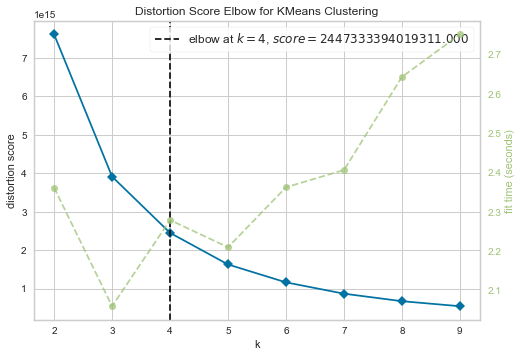

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [173]:
visual.fit(localdata)
visual.show()

In [174]:
# Fit the Clustering Model

kmeans = KMeans(n_clusters=4, random_state = 42)
newtrain["clusters"] = kmeans.fit_predict(localdata) 

In [176]:
# Apply Anova to check the Significance of the Clusters Generated

# Ho: That the Cluster Labels have no Significance wrt Target
# Ha: That the Cluster Labels have Significance wrt Target

from statsmodels.formula.api import ols
olsmodel = ols("price~clusters", data = newtrain).fit()

# Print anova table

from statsmodels.stats.anova import anova_lm
print(anova_lm(olsmodel))

                df        sum_sq       mean_sq           F  PR(>F)
clusters       1.0  2.464058e+13  2.464058e+13  6613.45662     0.0
Residual  114478.0  4.265249e+14  3.725824e+09         NaN     NaN


In [178]:
cols = ["locality", "furnish_type", "area", 
        "security_deposit", "floor_encoded", "neighbourhood"]

localtest = newtest.loc[:, cols]

kmeans = KMeans(n_clusters=4, random_state = 42)
newtest["clusters"] = kmeans.fit_predict(localtest) 

### Model Building

1. Base Model - Avg of Price
2. Decision Tree Model

In [179]:
# Base Model
pred = train.price.mean()

submission = pd.DataFrame({"Property_ID":test.Property_ID,
                          "price":pred})
submission.to_csv("Basemodel.csv", index = False) # RMSE: 63702.869635

36708.363268693225

In [181]:
# Splitting the Data in Train and Test

from sklearn.model_selection import train_test_split

X = newtrain.drop("price", axis = 1)
y = newtrain.price

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20,
                                               random_state = 786, 
                                               stratify = newtrain["clusters"])

In [184]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
xgb = XGBRegressor()
cboost = CatBoostRegressor()

In [183]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtree = DecisionTreeRegressor()
pred_dtree = dtree.fit(xtrain, ytrain).predict(xtest)
print("RMSE for {} model is {} :".format("dtree", 
                                         np.sqrt(mean_squared_error(ytest, pred_dtree))))

RMSE for dtree model is 39051.80203608134 :


In [191]:
pred_df = pd.DataFrame()
for model, name in zip([rf, gbm, xgb, cboost], 
                       ["rf", "gbm", "xgb", "cboost"]):
    model.fit(xtrain, ytrain)
    print("RMSE for {} model is {} :".format(name, 
                                         np.sqrt(mean_squared_error(ytest, 
                                                    model.predict(xtest)))))
    #pred_df[name] = model.predict(newtest)

RMSE for rf model is 27725.255718816425 :
RMSE for gbm model is 26804.56190651148 :
RMSE for xgb model is 27858.629940642808 :
Learning rate set to 0.083589
0:	learn: 58733.9006418	total: 200ms	remaining: 3m 20s
1:	learn: 55075.6508049	total: 230ms	remaining: 1m 54s
2:	learn: 51778.3592582	total: 260ms	remaining: 1m 26s
3:	learn: 48787.5601303	total: 266ms	remaining: 1m 6s
4:	learn: 46146.9671142	total: 288ms	remaining: 57.3s
5:	learn: 43791.4042979	total: 298ms	remaining: 49.4s
6:	learn: 41767.4640836	total: 306ms	remaining: 43.4s
7:	learn: 39942.7913289	total: 312ms	remaining: 38.6s
8:	learn: 38290.1020465	total: 318ms	remaining: 35s
9:	learn: 36819.1828906	total: 326ms	remaining: 32.3s
10:	learn: 35522.7396612	total: 331ms	remaining: 29.8s
11:	learn: 34382.2227436	total: 339ms	remaining: 27.9s
12:	learn: 33417.8516726	total: 344ms	remaining: 26.1s
13:	learn: 32529.4727929	total: 353ms	remaining: 24.9s
14:	learn: 31789.1640314	total: 368ms	remaining: 24.1s
15:	learn: 31132.9352729	to

In [193]:
# Lightgbm

from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

pred_lgbm = lgbm.fit(xtrain, ytrain).predict(xtest)
print("RMSE for {} model is {} :".format("LGBM", 
                                         np.sqrt(mean_squared_error(ytest, pred_lgbm))))

RMSE for LGBM model is 27577.683191260574 :


#### Models Summary
* Base Model: 61000
* Decision Tree: 39051
* Random Forest: 27750
* **Gradient Boosting: 26804**
* Xtreme Gradient Boosting: 27858
* LightGBM Model: 27577

### Gradient Boosting - Cross Validation Model

In [194]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True)

gbm = GradientBoostingRegressor(random_state = 420)
pred_model = pd.DataFrame()

n = 10
for i in range(n):
    folds = next(kfold.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = gbm.fit(xtrain, ytrain).predict(xtest)
    
    
vals = pred_model.median(axis = 1)
print("RMSE for {} model is {} :".format("10CV", 
                                         np.sqrt(mean_squared_error(ytest, 
                                                                    vals))))

RMSE for 10CV model is 26172.35358540253 :


<AxesSubplot:>

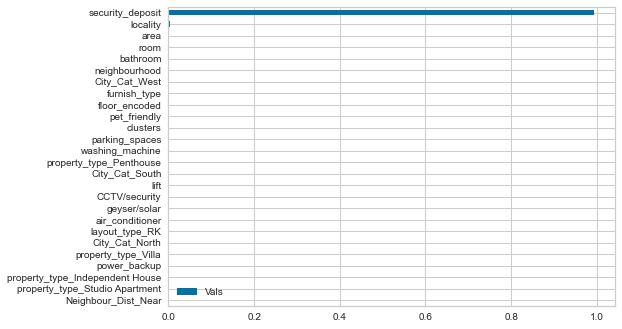

In [202]:
pd.DataFrame(gbm.feature_importances_, 
             index = gbm.feature_names_in_, 
             columns = ["Vals"]).sort_values(ascending = True, by = "Vals").plot(kind = "barh")

In [199]:
# Stacking Model with CV
from sklearn.ensemble import StackingRegressor
level_0 = [("rf", rf), ("xgb", xgb)]

In [ ]:
stack = StackingRegressor(estimators = level_0, final_estimator = gbm)
pred_model = pd.DataFrame()

n = 10
for i in range(n):
    folds = next(kfold.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = stack.fit(xtrain, ytrain).predict(xtest)
    
    
vals = pred_model.median(axis = 1)
print("RMSE for {} model is {} :".format("Stacking Model", 
                                         np.sqrt(mean_squared_error(ytest, 
                                                                    vals))))

#### Final Summary of the Models

* Base Model: 61000
* Decision Tree: 39051
* Random Forest: 27750
* **Gradient Boosting: 26804**
* Xtreme Gradient Boosting: 27858
* LightGBM Model: 27577

* **Stacking Model: 26100**